In [1]:
import torch
import torchvision
import fastai

In [2]:

from fastai.vision import *

In [3]:
learn = load_learner(path = 'models', file = 'simpledrive1')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

In [4]:
learn.model = learn.model.cuda()

In [5]:
learn.data.classes

In [6]:
from jetbot import Camera

In [7]:
# https://www.scivision.co/numpy-image-bgr-to-rgb/
def convert_bgr_to_rgb(x): return x[...,::-1]

In [8]:
c = Camera()
c.fps = 2
c.start()

In [17]:
img = convert_bgr_to_rgb(c.value).astype('uint8')

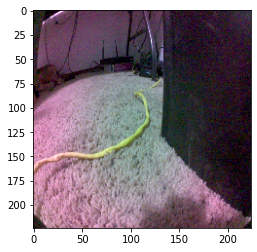

In [18]:
plt.imshow(img)

In [26]:
def CaptureImage_Fastai():
    img = convert_bgr_to_rgb(c.value).astype('uint8')
    imgTensor = torch.Tensor(img)
    imgTensor2 = imgTensor.transpose(0,2)
    imgTensor2 = imgTensor2.transpose(1,2) # not sure why I need this
    imgfai = Image(imgTensor2/255)
    return imgfai

In [27]:
# imgfai.px = imgfai.px.cuda()
imgfai = CaptureImage_Fastai()

In [21]:
imgfai.device

device(type='cpu')

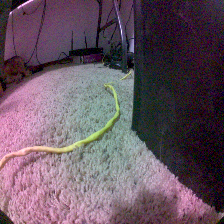

In [22]:
imgfai

In [28]:
imgfai = CaptureImage_Fastai()
r = learn.predict(imgfai)

In [24]:
r

(Category tensor(2), tensor(2), tensor([0.3470, 0.2552, 0.3978]))

In [43]:
#export
def InferenceCapture():
    imgfai = CaptureImage_Fastai()
    r = learn.predict(imgfai)
    return r[0].obj, r

In [44]:
%timeit -n 10 _=InferenceCapture()

62.5 ms ± 2.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [46]:
InferenceCapture()[0]

'up'

In [52]:
c.stop()
del c